<h1><strong>DBSCAN</strong></h1>

<h3><strong>Author: Andy Le</strong></h3>

Partitioning and hierarchical clustering methods are designed to find spherical clusters. They have difficulty when the clusters have arbitrary shapes. Density-based clustering methods can discover nonspherical clusters by modeling clusters as dense regions in the data space. The DBSSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm is one such method. I will be implementing the DBSCAN algorithm to identify moon-snaped, aniso, and circular clusters.

<h2><strong>Objectives</strong></h2>
<li style="text-align: justify;">1. To implement the <span style="color: #339966;"><strong>DBScan</strong></span> algorithm and test it under different configurations</li>
<li style="text-align: justify;">2. To evaluate the quality of the clusterings</li>
<li style="text-align: justify;">3. To visualize clusterings</li>

<h2>Dataset</h2>

<p style="text-align: justify;">Three datasets with different shapes and numbers of clusters that the k-means algorithm fails to cluster correctly. Each dataset contains 1500 samples, and each sample has two dimensions (x and y).  
</p>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn.metrics.silhouette_score

moons_dataset_name = 'moons.csv' 
aniso_dataset_name = 'aniso.csv'
circles_dataset_name = 'circles.csv'

In [14]:
moons_data = np.loadtxt(open(moons_dataset_name, "rb"), delimiter=",")
aniso_data = np.loadtxt(open(aniso_dataset_name, "rb"), delimiter=",")
circles_data = np.loadtxt(open(circles_dataset_name, "rb"), delimiter=",")

<h2>Implement the DBSCAN  Algorithm</h2>

<p style="text-align: justify;">I will implement the DBSCAN using the following algorithm:</p>

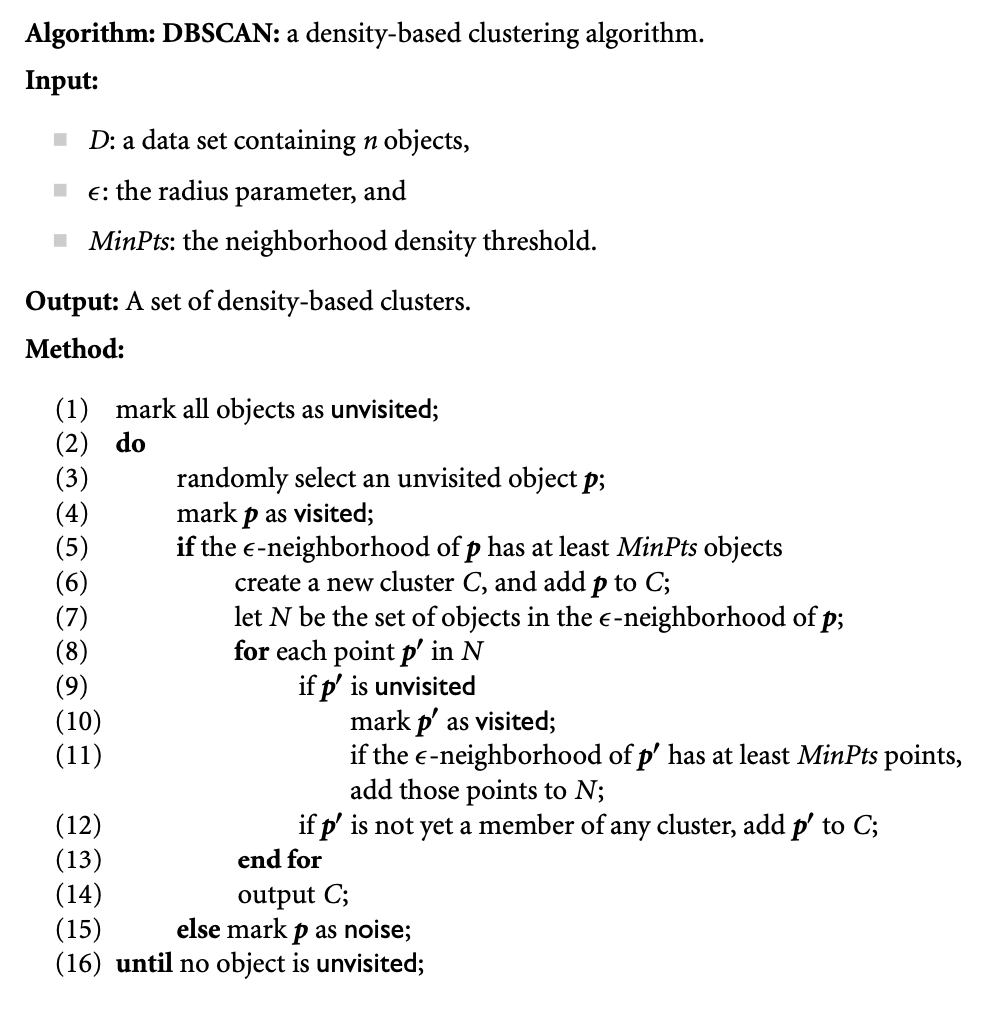

In [3]:
# Returns the epsilon-neighborhood of a point.
def get_neighborhood(point, dataset, epsilon):
    
    neighborhood = []
    point1 = np.array(point)
    
    # calculate the euclidean distance between the point and every other point in the dataset
    for point2 in dataset:
        dist = np.linalg.norm(point1 - point2)
        
        # if the euclidean distance is within epsilon, add the point to neighborhood
        if not np.array_equal(point1, point2) and dist <= epsilon:
            neighborhood.append(point2.tolist())
            
    return neighborhood

In [4]:
# Returns a point's db cluster.
def db_cluster(point, dataset, epsilon, min_points, unvisited, clusters, noise):
    
    # get the point's epsilon-neighborhood
    neighborhood = get_neighborhood(point, dataset, epsilon)

    # if the neighborhood contains at least min_points number of points
    if len(neighborhood) >= min_points:

        # create a new cluster, and add the point to the cluster
        cluster = [point]

        # for each neighbor in the point's neighborhood, get and merge the neighbor's db cluster
        for neighbor in neighborhood:

            # if the neighbor is unvisited
            if neighbor in unvisited:

                # mark the neighbor as visited
                unvisited.remove(neighbor)

                # recursively get the neighbor's db cluster, and merge with the current cluster
                cluster += db_cluster(neighbor, dataset, epsilon, min_points, unvisited, clusters, noise)

            # if the neighbor is not yet a member of any cluster, add the neighbor to the cluster
            if all(neighbor not in existing_cluster for existing_cluster in clusters):
                cluster.append(neighbor)

        # return the point's db cluster
        return cluster

    # else mark the point as noise
    else: 
        noise.append(point)
        return []

In [5]:
import random

def dbscan(dataset, epsilon, min_points):
    
    clusters = []
    noise = []
    
    # mark all points as unvisited
    unvisited = dataset.tolist()
    
    # shuffle unvisited points
    random.shuffle(unvisited)
    
    # loop until all points have been visited
    while len(unvisited) > 0:
        
        # randomly select an unvisited point
        point = unvisited[0]
        
        # mark the point as visited
        unvisited.pop(0)

        # get the point's db cluster
        cluster = db_cluster(point, dataset, epsilon, min_points, unvisited, clusters, noise)
    
        # save the cluster
        if len(cluster) > 0:
            clusters.append(np.array(cluster))
    
    return clusters, np.array(noise)

<h2>Clustering Visualization and Evaluation</h2>

<p style="text-align: justify;">Next I will use matplotlib to visualize the clusters. Each cluster will be distinguised with a different color. Black will represent the outlier points. 
    
I will also evaluate the quality of each clustering using the silhouette score. This is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from âˆ’1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
</p>


In [29]:
def visualize_clusters(clusters, outliers, epsilon, min_points, silhouette):
    
    num_clusters = len(clusters)
    
    plt.title(f"epsilon: {epsilon}, min_points: {min_points}, clusters: {num_clusters}, silhouette: {silhouette}")
    
    # plot the outliers
    if len(outliers) > 0:
        plt.scatter(outliers[:,0], outliers[:,1], color='black')
    
    # plot the clusters
    for cluster in clusters:
        plt.scatter(cluster[:,0], cluster[:,1])

    plt.show()

In [ ]:
# plots k_values and silhouette scores
def plot_scores(k_values, scores, dataset_name):
    plt.title(dataset_name)
    plt.xlabel("k")
    plt.ylabel("Silhouette")
    plt.scatter(k_values, scores)
    plt.show()

<h2>Moon-shaped</h2>

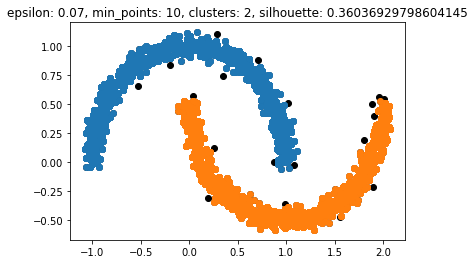

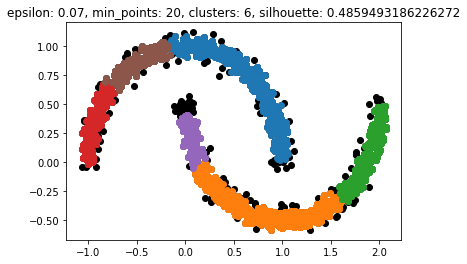

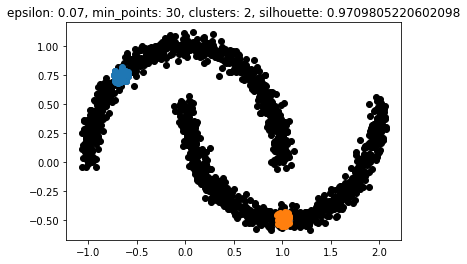

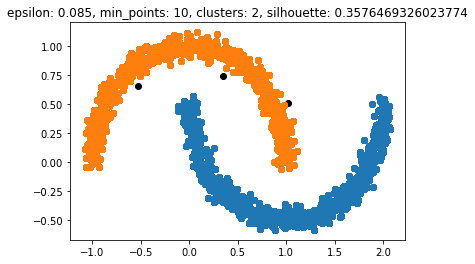

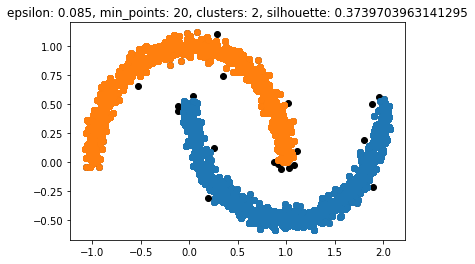

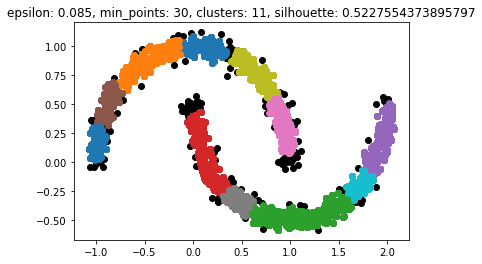

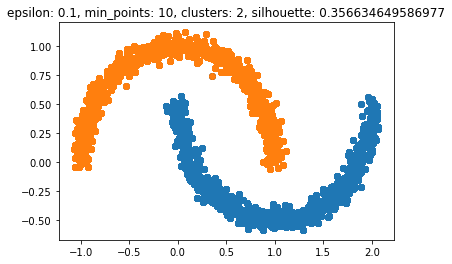

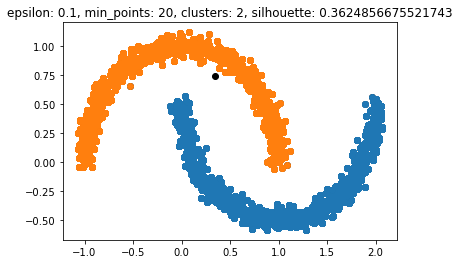

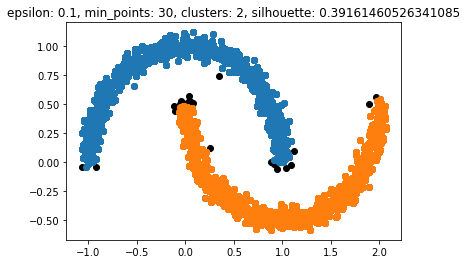

In [11]:
# perform db scan for moons data

k_values = []
scores = []

for epsilon in [0.07, 0.085, 0.1]:
    for min_points in [10, 20, 30]:
        clusters, outliers = dbscan(moons_data, epsilon, min_points)
        k_values.append(len(clusters))
        score = silhouette_score(clusters)
        scores.append(score)
        visualize_clusters(clusters, outliers, epsilon, min_points, score)

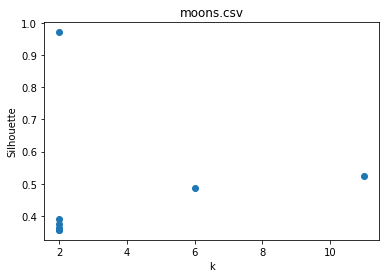

In [12]:
plot_scores(k_values, scores, moons_dataset_name)

Based on the plots k=2 is the best number of clusters. This also matches with the silhouette plot because a clustering with k=2 produced the highest silhouette score.

<h2>Aniso</h2>

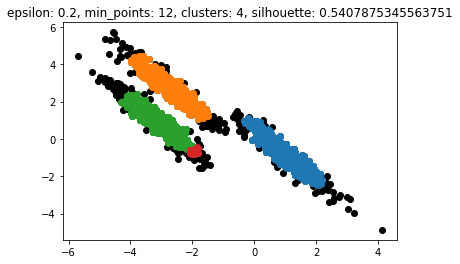

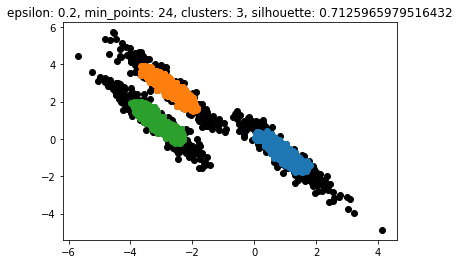

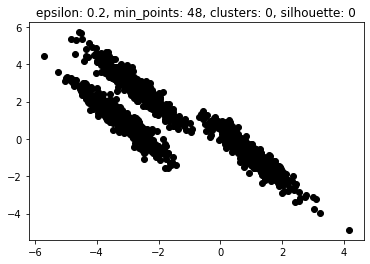

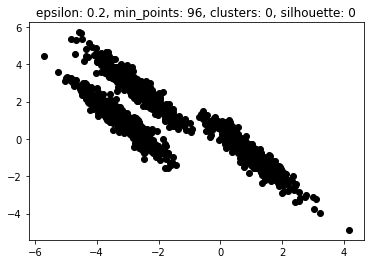

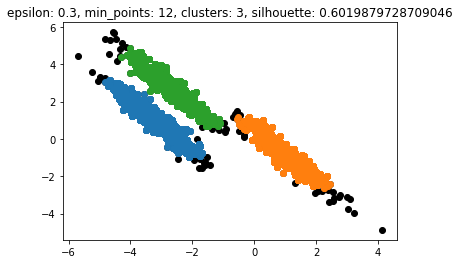

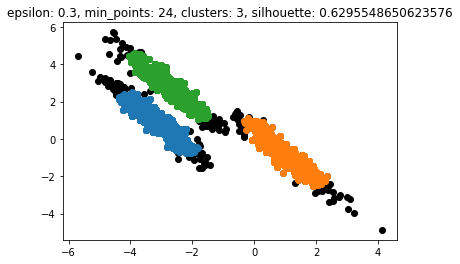

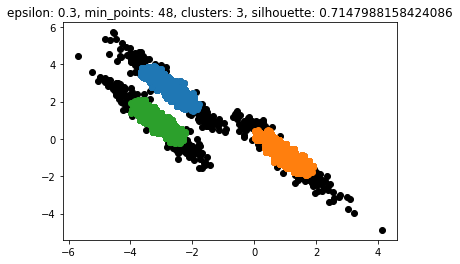

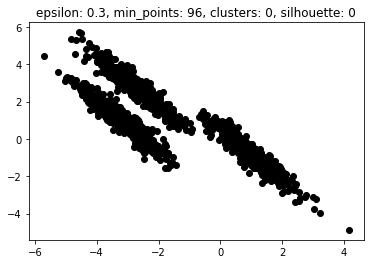

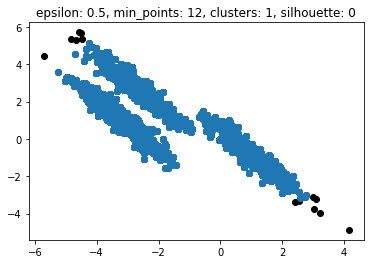

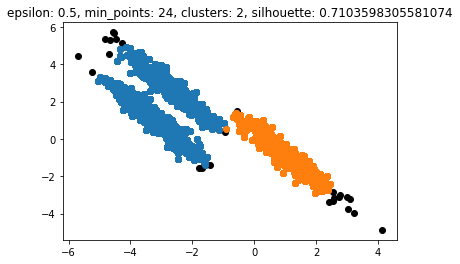

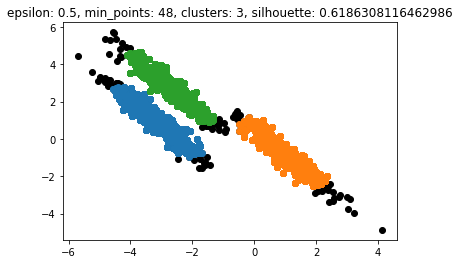

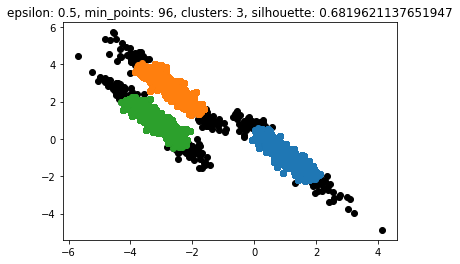

In [23]:
# perform db scan for aniso data

k_values = []
scores = []

for epsilon in [0.2, 0.3, 0.5]:
    for min_points in [12, 24, 48, 96]:
        clusters, outliers = dbscan(aniso_data, epsilon, min_points)
        k_values.append(len(clusters))
        score = silhouette_score(clusters)
        scores.append(score)
        visualize_clusters(clusters, outliers, epsilon, min_points, score)

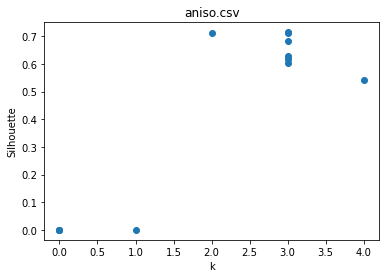

In [24]:
plot_scores(k_values, scores, aniso_dataset_name)

Based on the plots k=3 is the best number of clusters. This also matches with the silhouette plot because a clustering with k=3 produced the highest silhouette score.

<h2>Circular</h2>

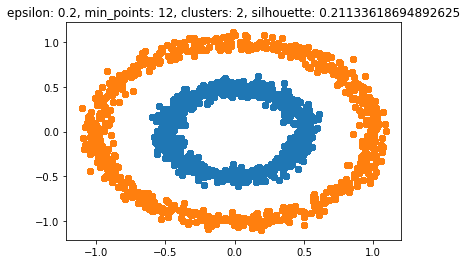

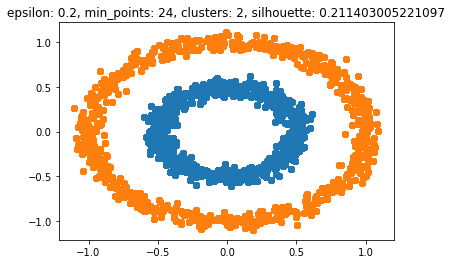

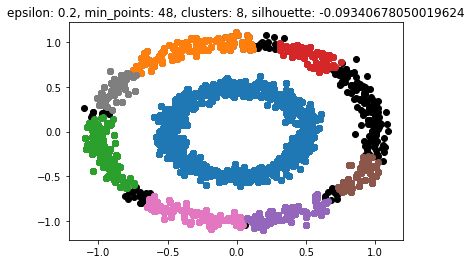

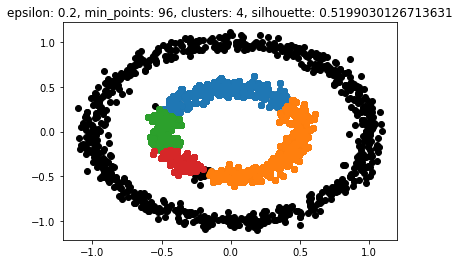

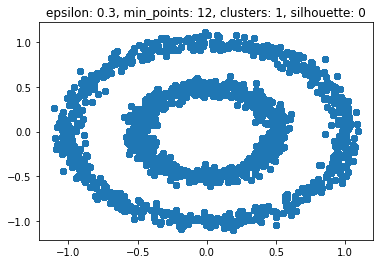

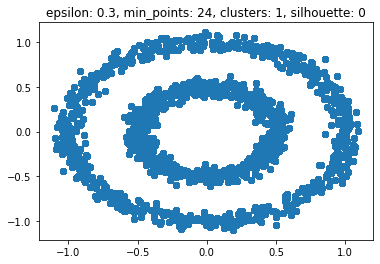

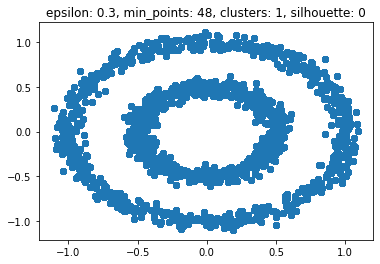

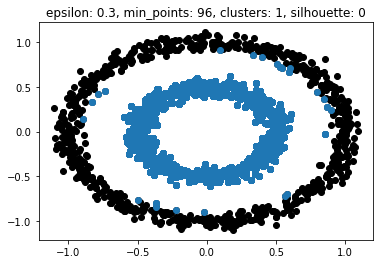

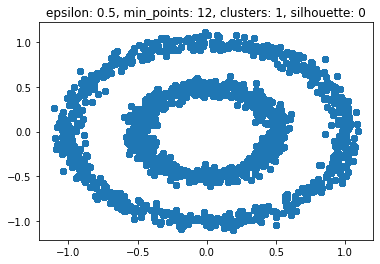

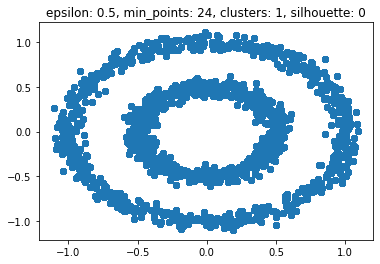

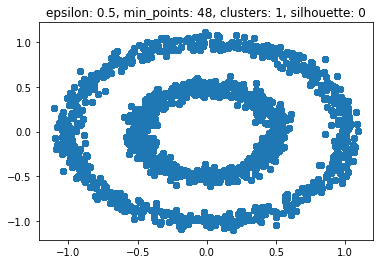

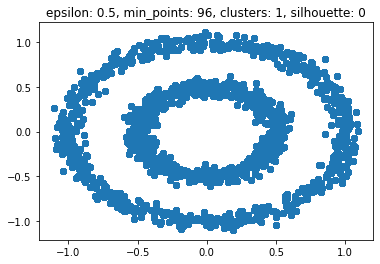

In [30]:
# perform db scan for circles data

k_values = []
scores = []

for epsilon in [0.2, 0.3, 0.5]:
    for min_points in [12, 24, 48, 96]:
        clusters, outliers = dbscan(circles_data, epsilon, min_points)
        k_values.append(len(clusters))
        score = silhouette_score(clusters)
        scores.append(score)
        visualize_clusters(clusters, outliers, epsilon, min_points, score)

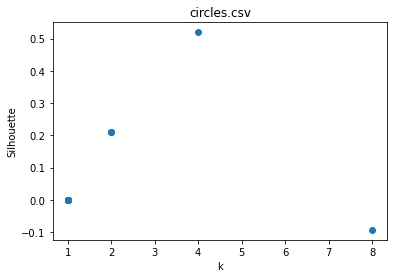

In [31]:
plot_scores(k_values, scores, circles_dataset_name)

Based on the plots, k=2 is the best number of clusters. However, the silhouette plot shows that k=4 is the best. This is because one of the clusters is enclosed within another cluster. In this case, silhouette score is not the best metric to evaluate cluster quality.